In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
results  = np.load('raw/wolfpack/run_test.npy')
print(results.shape)

(1, 11, 11, 2)


In [17]:
results = np.mean(results, axis=3)
print(results)

[[[ 1174.    145.    828.    646.   1356.    106.    642.    -22.   1133.
    -105.    762. ]
  [  538.    456.    833.     31.    748.    546.    -39.    972.    944.
     860.    713. ]
  [  630.    178.   1076.    315.    872.    329.   1134.     44.    723.
     -65.    362. ]
  [  579.    876.    -81.    853.   1080.   -769.   1148.    931.    196.
    -905.    697. ]
  [ -203.    654.    173.    642.    140.    757.5   171.    591.     88.
     -65.   -242. ]
  [  498.    945.   1044.    859.    635.    259.   -105.    384.    319.
     595.    456. ]
  [  279.    515.    725.    299.    155.   -502.    316.   -279.    378.
     666.    469. ]
  [  581.     40.     75.     60.    430.    575.    668.    347.   -121.
     614.    350. ]
  [  853.    297.   1142.   -413.    756.   -144.    226.   1022.   1074.
     141.   -104. ]
  [  532.   1127.    711.   -111.    938.   -158.    678.    118.    760.
     193.     58. ]
  [ 1013.    533.   1007.    572.    908.    564.    337.   

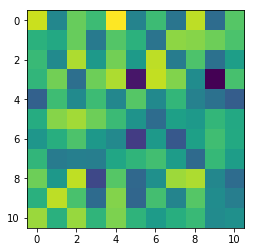

In [19]:
plt.imshow(results[0], interpolation='nearest')
plt.show()